In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0, 30, 1000)

In [3]:
sin_y = np.sin(2*x)
ramp_y = x%2

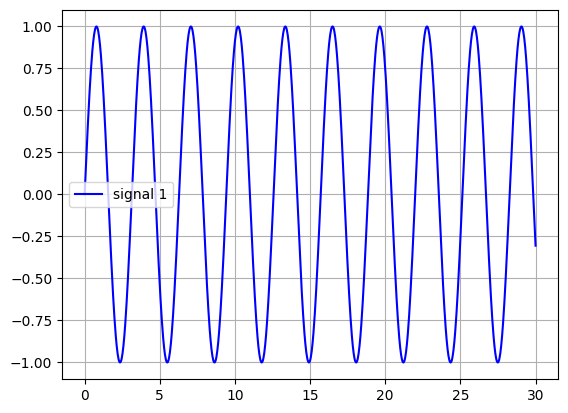

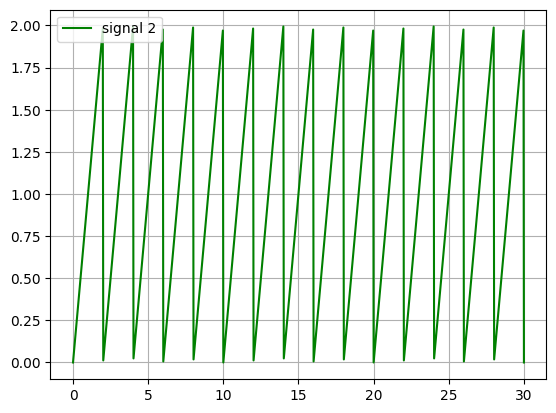

In [4]:
plt.plot(x,sin_y, label='signal 1', color='b')
plt.legend()
plt.grid()
plt.show()
plt.plot(x, ramp_y, label='signal 2', color='g')
plt.legend()
plt.grid()
plt.show()

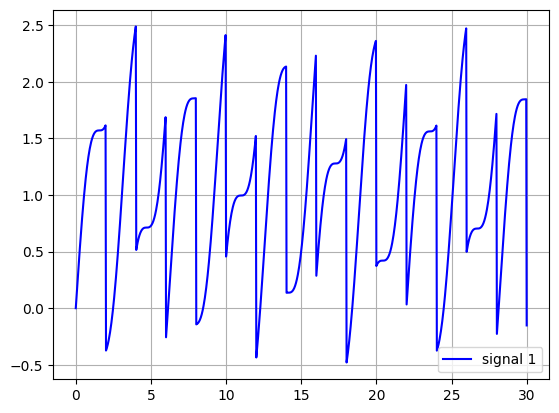

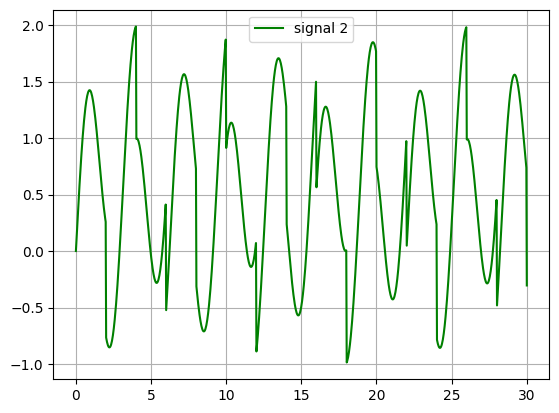

In [5]:
mixed_sin, mixed_ramp = np.dot([[0.5, 1], [1, 0.5]], [sin_y, ramp_y])
plt.plot(x, mixed_sin, label='signal 1', color='b')
plt.legend()
plt.grid()
plt.show()
plt.plot(x, mixed_ramp, label='signal 2', color='g')
plt.legend()
plt.grid()
plt.show()

In [7]:
def whitening(matrix):
    matrix = np.array(matrix)
    mean = matrix.mean(axis=1, keepdims=True)
    matrix = matrix - mean
    covariance_matrix = np.cov(matrix)
    eig_val, eig_vec = np.linalg.eigh(covariance_matrix)
    diagonal_matrix_inv = np.sqrt(np.linalg.inv(np.diag(eig_val)))
    x_tilda = np.dot(eig_vec, np.dot(diagonal_matrix_inv, np.dot(eig_vec.T, matrix)))
    return x_tilda


def doICA(matrix, tolerance=1e-6):
    matrix = whitening(matrix)
    n = matrix.shape[0]
    W = np.zeros((n,n))
    for i in range(n):
        w = np.random.rand(n)
        for j in range(100000):
            w_new = (matrix * (np.tanh(np.dot(np.transpose(w), matrix)))).mean(axis=1) - (1 - np.tanh(np.dot(np.transpose(w), matrix))*np.tanh(np.dot(np.transpose(w), matrix))).mean() * w
            w_new = w_new / np.sqrt((w_new**2).sum())
            if i >= 1:
                w_new -= np.dot(np.dot(w_new, W[:i].T), W[:i])
            distance = np.abs(np.abs((w*w_new).sum()) - 1)
            w = w_new
            if distance < tolerance:
                break
        W[i, :] = w
    return np.dot(W,matrix)


In [8]:
arr = doICA([mixed_sin, mixed_ramp])
print(arr.shape)

(2, 1000)


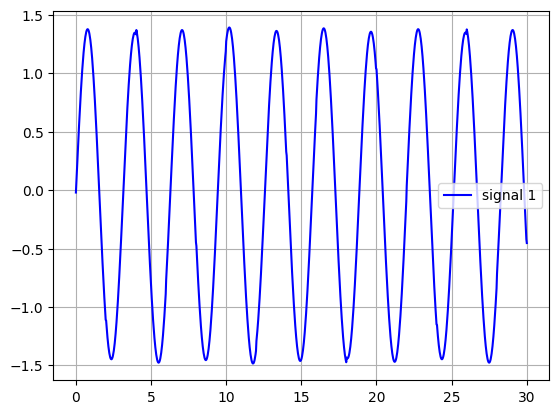

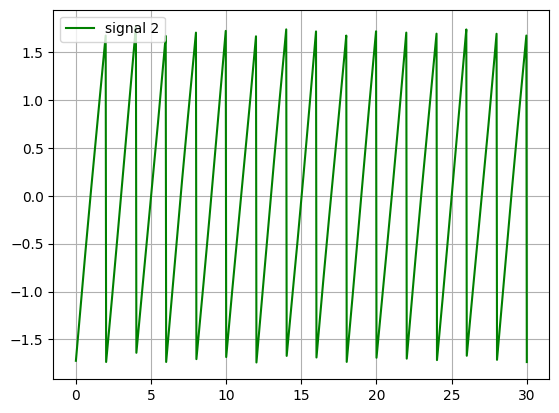

In [9]:
plt.plot(x,arr[0], label='signal 1', color='b')
plt.legend()
plt.grid()
plt.show()
plt.plot(x, arr[1], label='signal 2', color='g')
plt.legend()
plt.grid()
plt.show()